In [2]:
pip install pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [4]:
df = pd.read_csv('transfusion.csv')  # Replace name if different
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


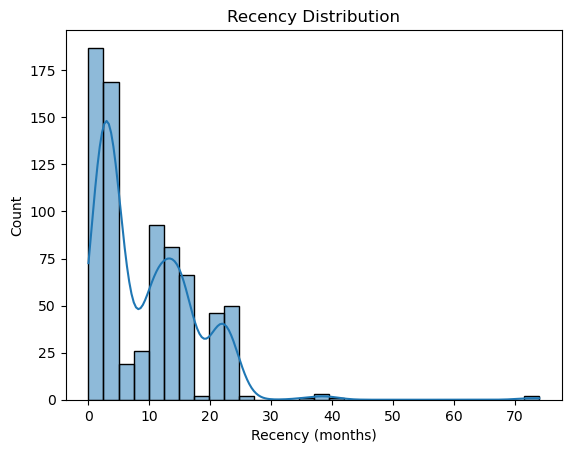

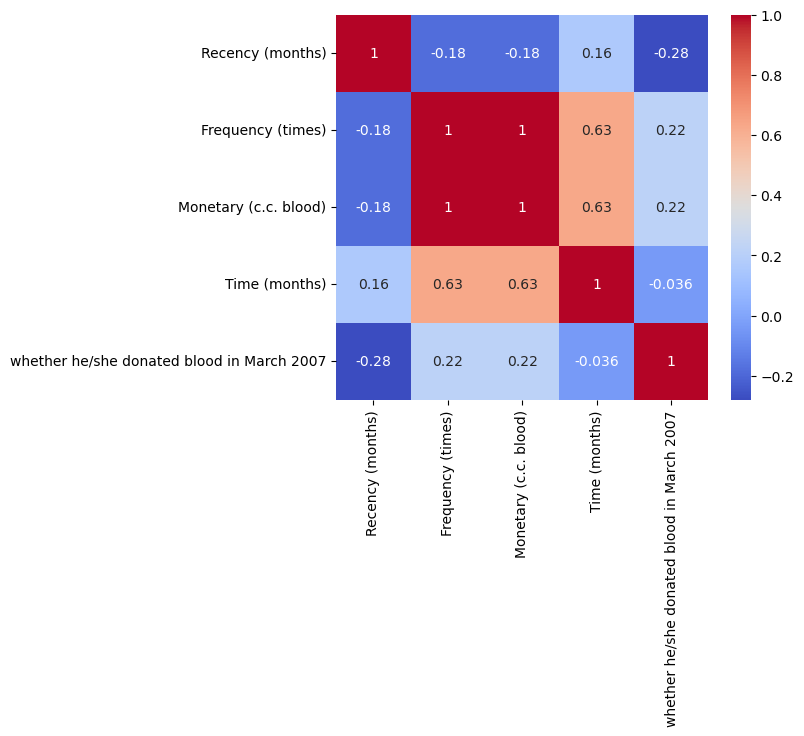

In [6]:
sns.histplot(df['Recency (months)'], kde=True)
plt.title('Recency Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [10]:
df.rename(columns={'whether he/she donated blood in March 2007': 'target'}, inplace=True)

In [9]:
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       113
           1       0.57      0.11      0.18        37

    accuracy                           0.76       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.72      0.76      0.69       150



In [12]:
print('ROC AUC Score:', roc_auc_score(y_test, y_proba))


ROC AUC Score: 0.7481463764649606


<Axes: >

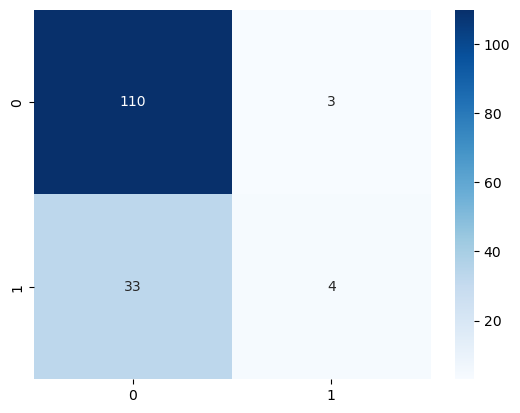

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')


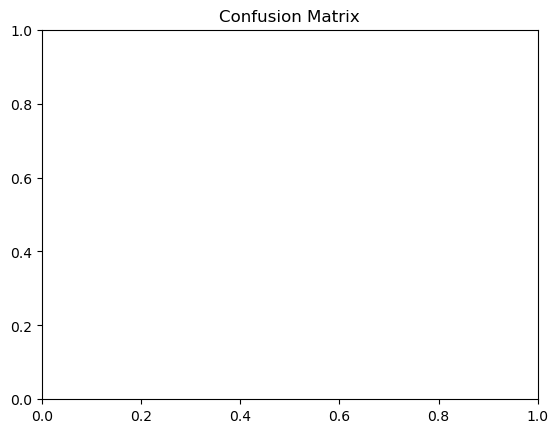

In [14]:
plt.title('Confusion Matrix')
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[110   3]
 [ 33   4]]


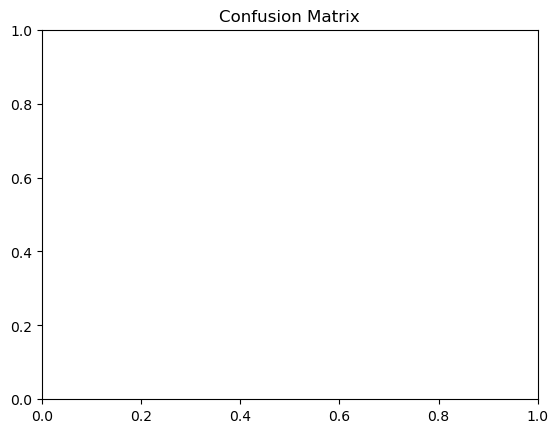

In [16]:
plt.title('Confusion Matrix')
plt.show()

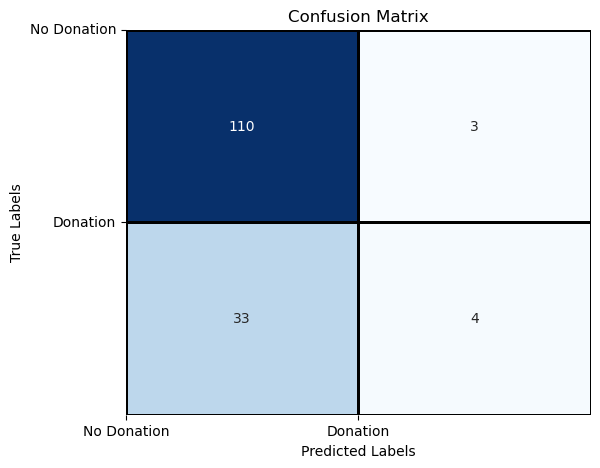

In [18]:
# Create confusion matrix again just to be safe
cm = confusion_matrix(y_test, y_pred)

# Make the plot readable and clean
plt.figure(figsize=(6, 5))  # Adjust size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1, linecolor='black')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['No Donation', 'Donation'])
plt.yticks([0, 1], ['No Donation', 'Donation'], rotation=0)
plt.show()

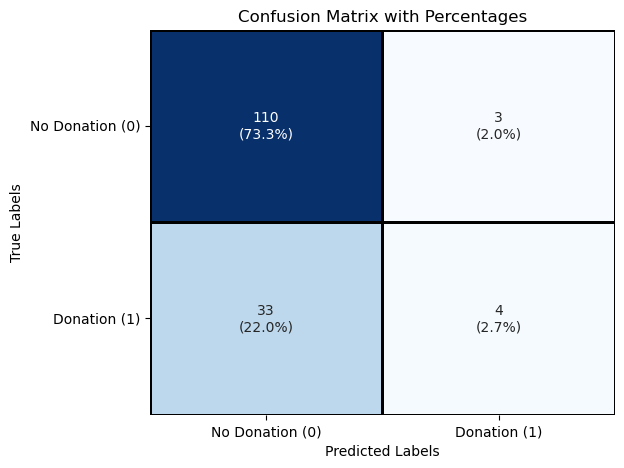

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm_sum = np.sum(cm)
cm_percent = cm / cm_sum * 100

# Combine counts and percentages
labels = np.array([["{0}\n({1:.1f}%)".format(value, percent)
                    for value, percent in zip(row_counts, row_percents)]
                   for row_counts, row_percents in zip(cm, cm_percent)])

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=1, linecolor='black')
plt.title('Confusion Matrix with Percentages')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0.5, 1.5], ['No Donation (0)', 'Donation (1)'], rotation=0)
plt.yticks([0.5, 1.5], ['No Donation (0)', 'Donation (1)'], rotation=0)
plt.show()
